# **Task #6 Prediction using Decision Tree Algorithm**
Submitted by Aswin Murali

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Setting the `seed` constant with value **0**.

In [ ]:
SEED: int = 0
np.random.seed(SEED)

### **Exploring the dataset**
Source > https://bit.ly/3kXTdox

In [ ]:
df = pd.read_csv('/content/Iris.csv')

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df = df.drop('Id', axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


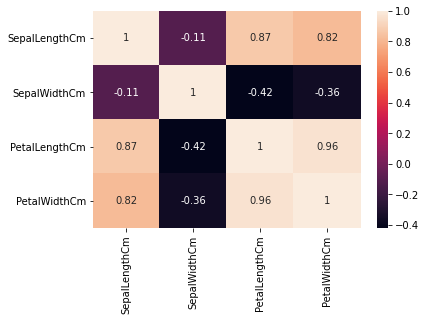

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
target = 'Species'
y = pd.DataFrame(df[target], columns=[target])
x = df.drop(target, axis=1)

In [ ]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### **Normalising the Dataset**

values using sklearn's `MinMaxScaler()` class.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
x_scaled = MinMaxScaler().fit_transform(x.values)
x = pd.DataFrame(x_scaled, columns=x.columns, index=df.index)

In [ ]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [ ]:
y.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


The classes present in dataset.

In [ ]:
print(y[target].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


We have **equal** number of classes in `Species`.

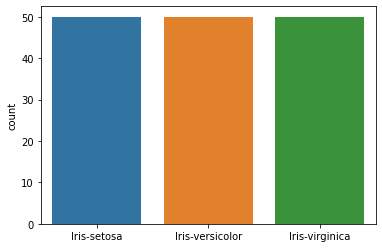

In [ ]:
sns.countplot(x=y[target].values)

Converting the class names from `string` into `int` values using sklearn's `LabelEncoder` class.

In [ ]:
from sklearn.preprocessing import LabelEncoder
y = pd.DataFrame(LabelEncoder().fit_transform(y.values.ravel()), columns=[target])

In [ ]:
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [ ]:
y[target].unique()

array([0, 1, 2])

## **Detecting Outliers**
Using seaborn's `boxplot()` function.

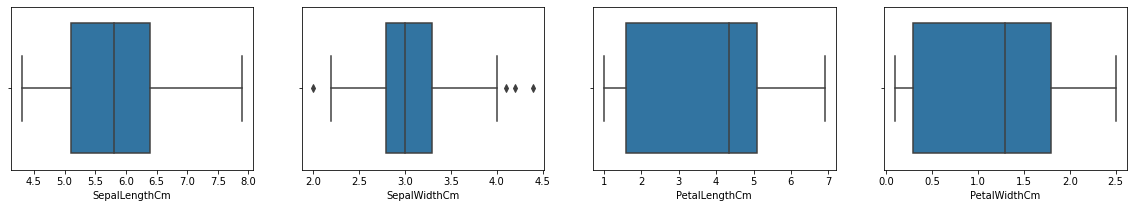

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(20, 3))
for i in range(len(x.columns)):
  sns.boxplot(x=df[x.columns[i]], ax=axes[i])

We find that *SepalWidthCm* column does have **outliers**.

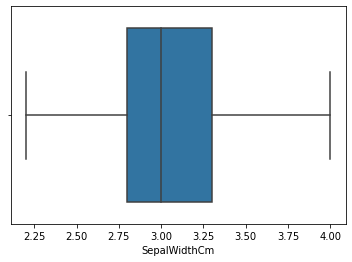

In [ ]:
# Interquartile Range (IQR)
column_name = 'SepalWidthCm'

Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)

IQR = Q3 - Q1

LOWER_LIMIT  = Q1 - (1.5 * IQR)
UPPER_LIMIT  = Q3 + (1.5 * IQR)

df = df.loc[(df[column_name] > LOWER_LIMIT) & (df[column_name] < UPPER_LIMIT)]

sns.boxplot(x=df['SepalWidthCm'])

The outliers are removed from *SepalWidthCm* column. Now we split the dataset into **train** and **test** dataset.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, shuffle=True
)

## **Decision Tree Classifier**
Using sklearn's `DecisionTreeClassifier()` class for building the model.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
predictions = dtree.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
confusion_matrix(y_test, predictions)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

## **Visualising the Decision Tree**
Using sklearn's `plot_tree()` function.

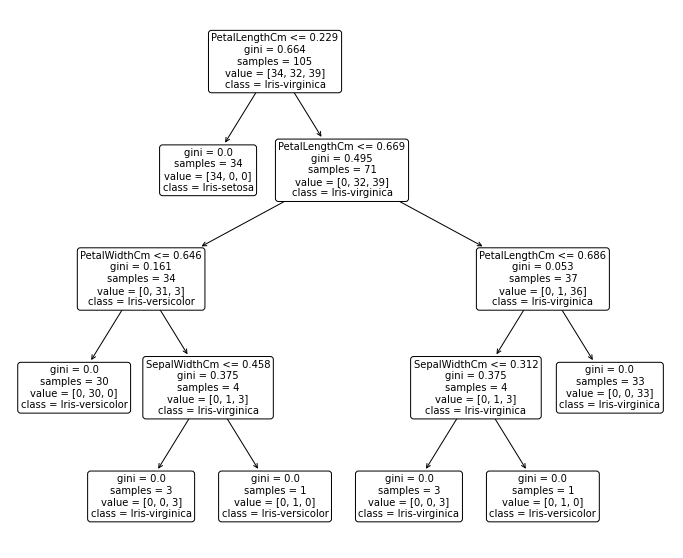

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 10))
plot_tree(
  dtree,
  fontsize=10,
  rounded=True,
  feature_names=x.columns,
  class_names=df[target].unique(),
);